## CHAPTER 9
# Data Aggregation and Group Operations
---
## 2012 Federal Election Commission

In [6]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [7]:
fec = pd.read_csv('P00000001-ALL.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
fec.info() # 100731 rows, 16 columns
fec.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [9]:
fec[:1]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [10]:
fec.cand_nm.value_counts()

Obama, Barack                     593746
Paul, Ron                         143757
Romney, Mitt                      107229
Gingrich, Newt                     47679
Santorum, Rick                     46559
Cain, Herman                       20107
Perry, Rick                        13575
Bachmann, Michelle                 13140
Roemer, Charles E. 'Buddy' III      5920
Pawlenty, Timothy                   4555
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Name: cand_nm, dtype: int64

In [11]:
fec.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [12]:
fec.groupby('cand_nm').contb_receipt_amt.sum()

cand_nm
Bachmann, Michelle                2.677435e+06
Cain, Herman                      7.047265e+06
Gingrich, Newt                    1.201183e+07
Huntsman, Jon                     3.204350e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.703000e+04
Obama, Barack                     1.335026e+08
Paul, Ron                         2.072257e+07
Pawlenty, Timothy                 4.255054e+06
Perry, Rick                       1.841151e+07
Roemer, Charles E. 'Buddy' III    3.674575e+05
Romney, Mitt                      8.521925e+07
Santorum, Rick                    1.072809e+07
Name: contb_receipt_amt, dtype: float64

In [13]:
parties = {'Bachmann, Michelle': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican',
    'Huntsman, Jon': 'Republican',
    'Johnson, Gary Earl': 'Republican',
    'McCotter, Thaddeus G': 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron': 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Perry, Rick': 'Republican',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Romney, Mitt': 'Republican',
    'Santorum, Rick': 'Republican'}

fec['party'] = fec.cand_nm.map(parties)
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [14]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [15]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [16]:
fec = fec[fec.contb_receipt_amt>0] # 991475

fec.shape

(991475, 17)

In [17]:
fec.contbr_occupation.value_counts().head()

RETIRED                  233990
INFORMATION REQUESTED     35107
ATTORNEY                  34286
HOMEMAKER                 29931
PHYSICIAN                 23432
Name: contbr_occupation, dtype: int64

In [18]:
np.where(fec.contbr_occupation.isin(['INFORMATION REQUESTED PER BEST EFFORTS',
                'INFORMATION REQUESTED','INFORMATION REQUESTED (BEST EFFORTS)']))[0]

array([     2,      6,     12, ..., 991470, 991472, 991474], dtype=int64)

In [19]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

fec.contbr_occupation = fec.contbr_occupation.map(lambda s: occ_mapping.get(s,s))
fec.contbr_occupation.value_counts().head()

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
Name: contbr_occupation, dtype: int64

In [20]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

fec.contbr_employer = fec.contbr_employer.map(lambda s: emp_mapping.get(s,s))
fec.contbr_employer.value_counts().head()

RETIRED          206675
SELF-EMPLOYED    125164
NOT PROVIDED      58396
NOT EMPLOYED      45877
NONE              19929
Name: contbr_employer, dtype: int64

In [21]:
display(fec.head())
df = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [22]:
over_2mm = df[df.sum(axis=1)>2000000]

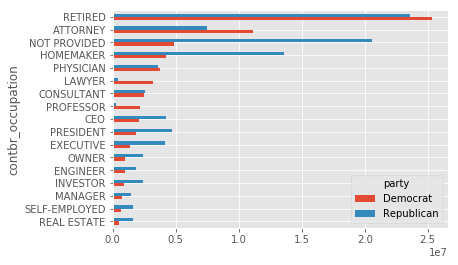

In [23]:
over_2mm.sort_values('Democrat').plot(kind='barh')

In [24]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

fec_mrbo.groupby('cand_nm').apply(lambda df: df.groupby('contbr_occupation').
                                  contb_receipt_amt.sum().sort_values(ascending=False)[:7])

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [25]:
fec_mrbo.groupby('cand_nm').apply(lambda df: df.groupby('contbr_employer').
                                  contb_receipt_amt.sum().sort_values(ascending=False)[:15])

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            18626807.16
               NOT EMPLOYED              8586308.70
               NOT PROVIDED              5053480.37
               HOMEMAKER                 2605408.54
               STUDENT                    318831.45
               VOLUNTEER                  257104.00
               MICROSOFT                  215585.36
               SIDLEY AUSTIN LLP          168254.00
               REFUSED                    149516.07
               DLA PIPER                  148235.00
               HARVARD UNIVERSITY         131368.94
               IBM                        128490.93
               GOOGLE                     125302.88
               MICROSOFT CORPORATION      108849.00
Romney, Mitt   NOT PROVIDED             12059527.24
               RETIRED                  11506225.71
               HOMEMAKER                 8147196.22
               SELF-EMPLOYE

In [26]:
# fec_mrbo.contb_receipt_amt.describe()
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins=[0,1,10,100,1000,10000,100000,1000000,10000000])
fec_mrbo.groupby([labels,'cand_nm']).contb_receipt_amt.size().unstack()

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [27]:
bucket_sums = fec_mrbo.groupby([labels,'cand_nm']).contb_receipt_amt.sum().unstack()
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [28]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


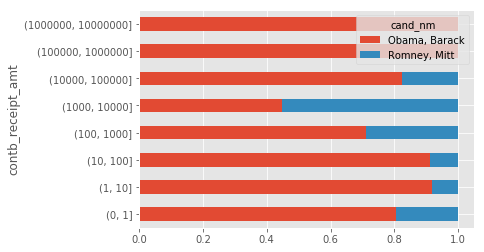

In [29]:
normed_sums.plot(kind='barh',stacked=True)

In [30]:
# fec_mrbo.contbr_st.value_counts()
totals = fec_mrbo.groupby(['cand_nm','contbr_st']).contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(axis=1)>100000]
percent = totals.div(totals.sum(axis=1),axis=0)
percent.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502


In [31]:
# 참고
pd.get_dummies(pd.Series(['one','two','one']))

df1=pd.DataFrame([[1,2],[3,4]])
df2=pd.DataFrame([[11,12],[13,14]])
pd.concat([df1,df2],axis=1,ignore_index=True)

,0,1,2,3
0,1,2,11,12
1,3,4,13,14
